In [162]:
# Import main libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Data preprocessing

In [164]:
df = pd.read_csv('vehicles.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Vehicles  48120 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 752.0+ KB


In [165]:
df.head()

,DateTime,Vehicles
0,2015-11-01 00:00:00,15
1,2015-11-01 01:00:00,13
2,2015-11-01 02:00:00,10
3,2015-11-01 03:00:00,7
4,2015-11-01 04:00:00,9


#### We can see that the dataset presents two different columns, one showing the datetime and the other one the vehicles registered at that time. It will be a good idea to divide the datetime into segments (hour, day, month, etc.)

In [167]:
def get_dom(dt):           # Function to extract the DATE
    return dt.day

def get_weekday(dt):       # Function to extract the WEEK DAY
    return dt.weekday()

def get_hour(dt):          # Function to extract the HOUR 
    return dt.hour

def get_year(dt):          # Function to extract the YEAR
    return dt.year

def get_month(dt):         # Function to extract the MONTH
    return dt.month

def get_dayofyear(dt):     # Function to extract the YEAR DAY
    return dt.dayofyear

def get_weekofyear(dt):    # Function to extract the YEAR WEEK
    return dt.weekofyear

In [168]:
df['DateTime'] = df['DateTime'].map(pd.to_datetime)

In [169]:
df['DateTime'].head()
df['date'] = df['DateTime'].map(get_dom)
df['weekday'] = df['DateTime'].map(get_weekday)
df['hour'] = df['DateTime'].map(get_hour)
df['month'] = df['DateTime'].map(get_month)
df['year'] = df['DateTime'].map(get_year)
df['dayofyear'] = df['DateTime'].map(get_dayofyear)
df['weekofyear'] = df['DateTime'].map(get_weekofyear)

df.drop('DateTime', axis = 1, inplace = True)

In [170]:
df.head()

,Vehicles,date,weekday,hour,month,year,dayofyear,weekofyear
0,15,1,6,0,11,2015,305,44
1,13,1,6,1,11,2015,305,44
2,10,1,6,2,11,2015,305,44
3,7,1,6,3,11,2015,305,44
4,9,1,6,4,11,2015,305,44


In [171]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Vehicles,48120.0,22.791334,20.750063,1.0,9.00,15.0,29.00,180.0
date,48120.0,15.700748,8.784073,1.0,8.00,16.0,23.00,31.0
weekday,48120.0,2.996010,2.000017,0.0,1.00,3.0,5.00,6.0
hour,48120.0,11.500000,6.922258,0.0,5.75,11.5,17.25,23.0
month,48120.0,5.884289,3.569872,1.0,3.00,5.0,9.00,12.0
year,48120.0,2016.269825,0.616093,2015.0,2016.00,2016.0,2017.00,2017.0
dayofyear,48120.0,163.926185,109.219475,1.0,72.00,144.0,260.00,366.0
weekofyear,48120.0,23.941646,15.718066,1.0,11.00,21.0,38.00,53.0


In [172]:
df.isnull().sum()

Vehicles      0
date          0
weekday       0
hour          0
month         0
year          0
dayofyear     0
weekofyear    0
dtype: int64

#### Since there are no missing values, we can go ahead with the EDA

## Exploratory Data Analysis

Text(0.5, 1.0, 'Correlation map')

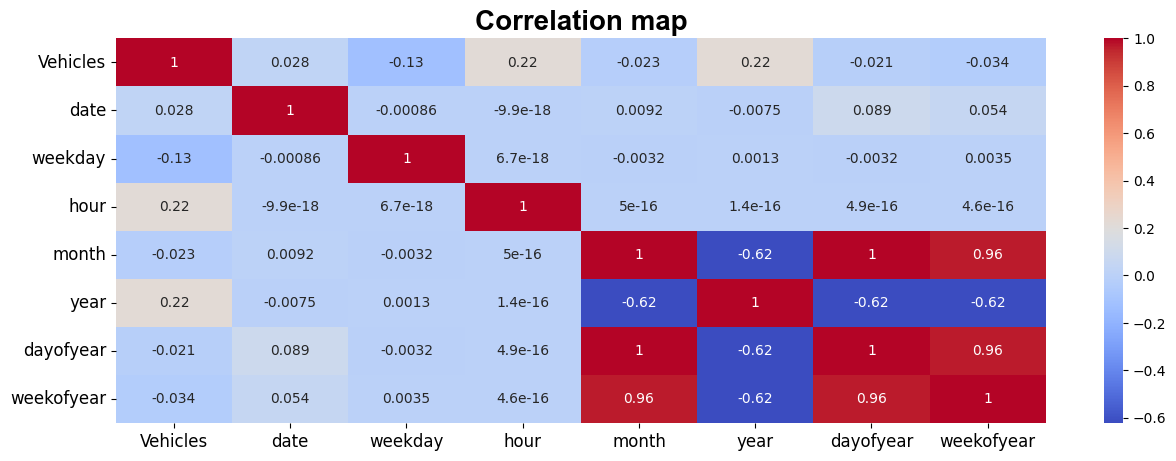

In [174]:
corr = df.corr()

plt.figure(figsize=(15,5))
sns.heatmap(corr, annot = True, cmap = 'coolwarm')
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title('Correlation map', fontsize = 20, fontweight='bold', **csfont)

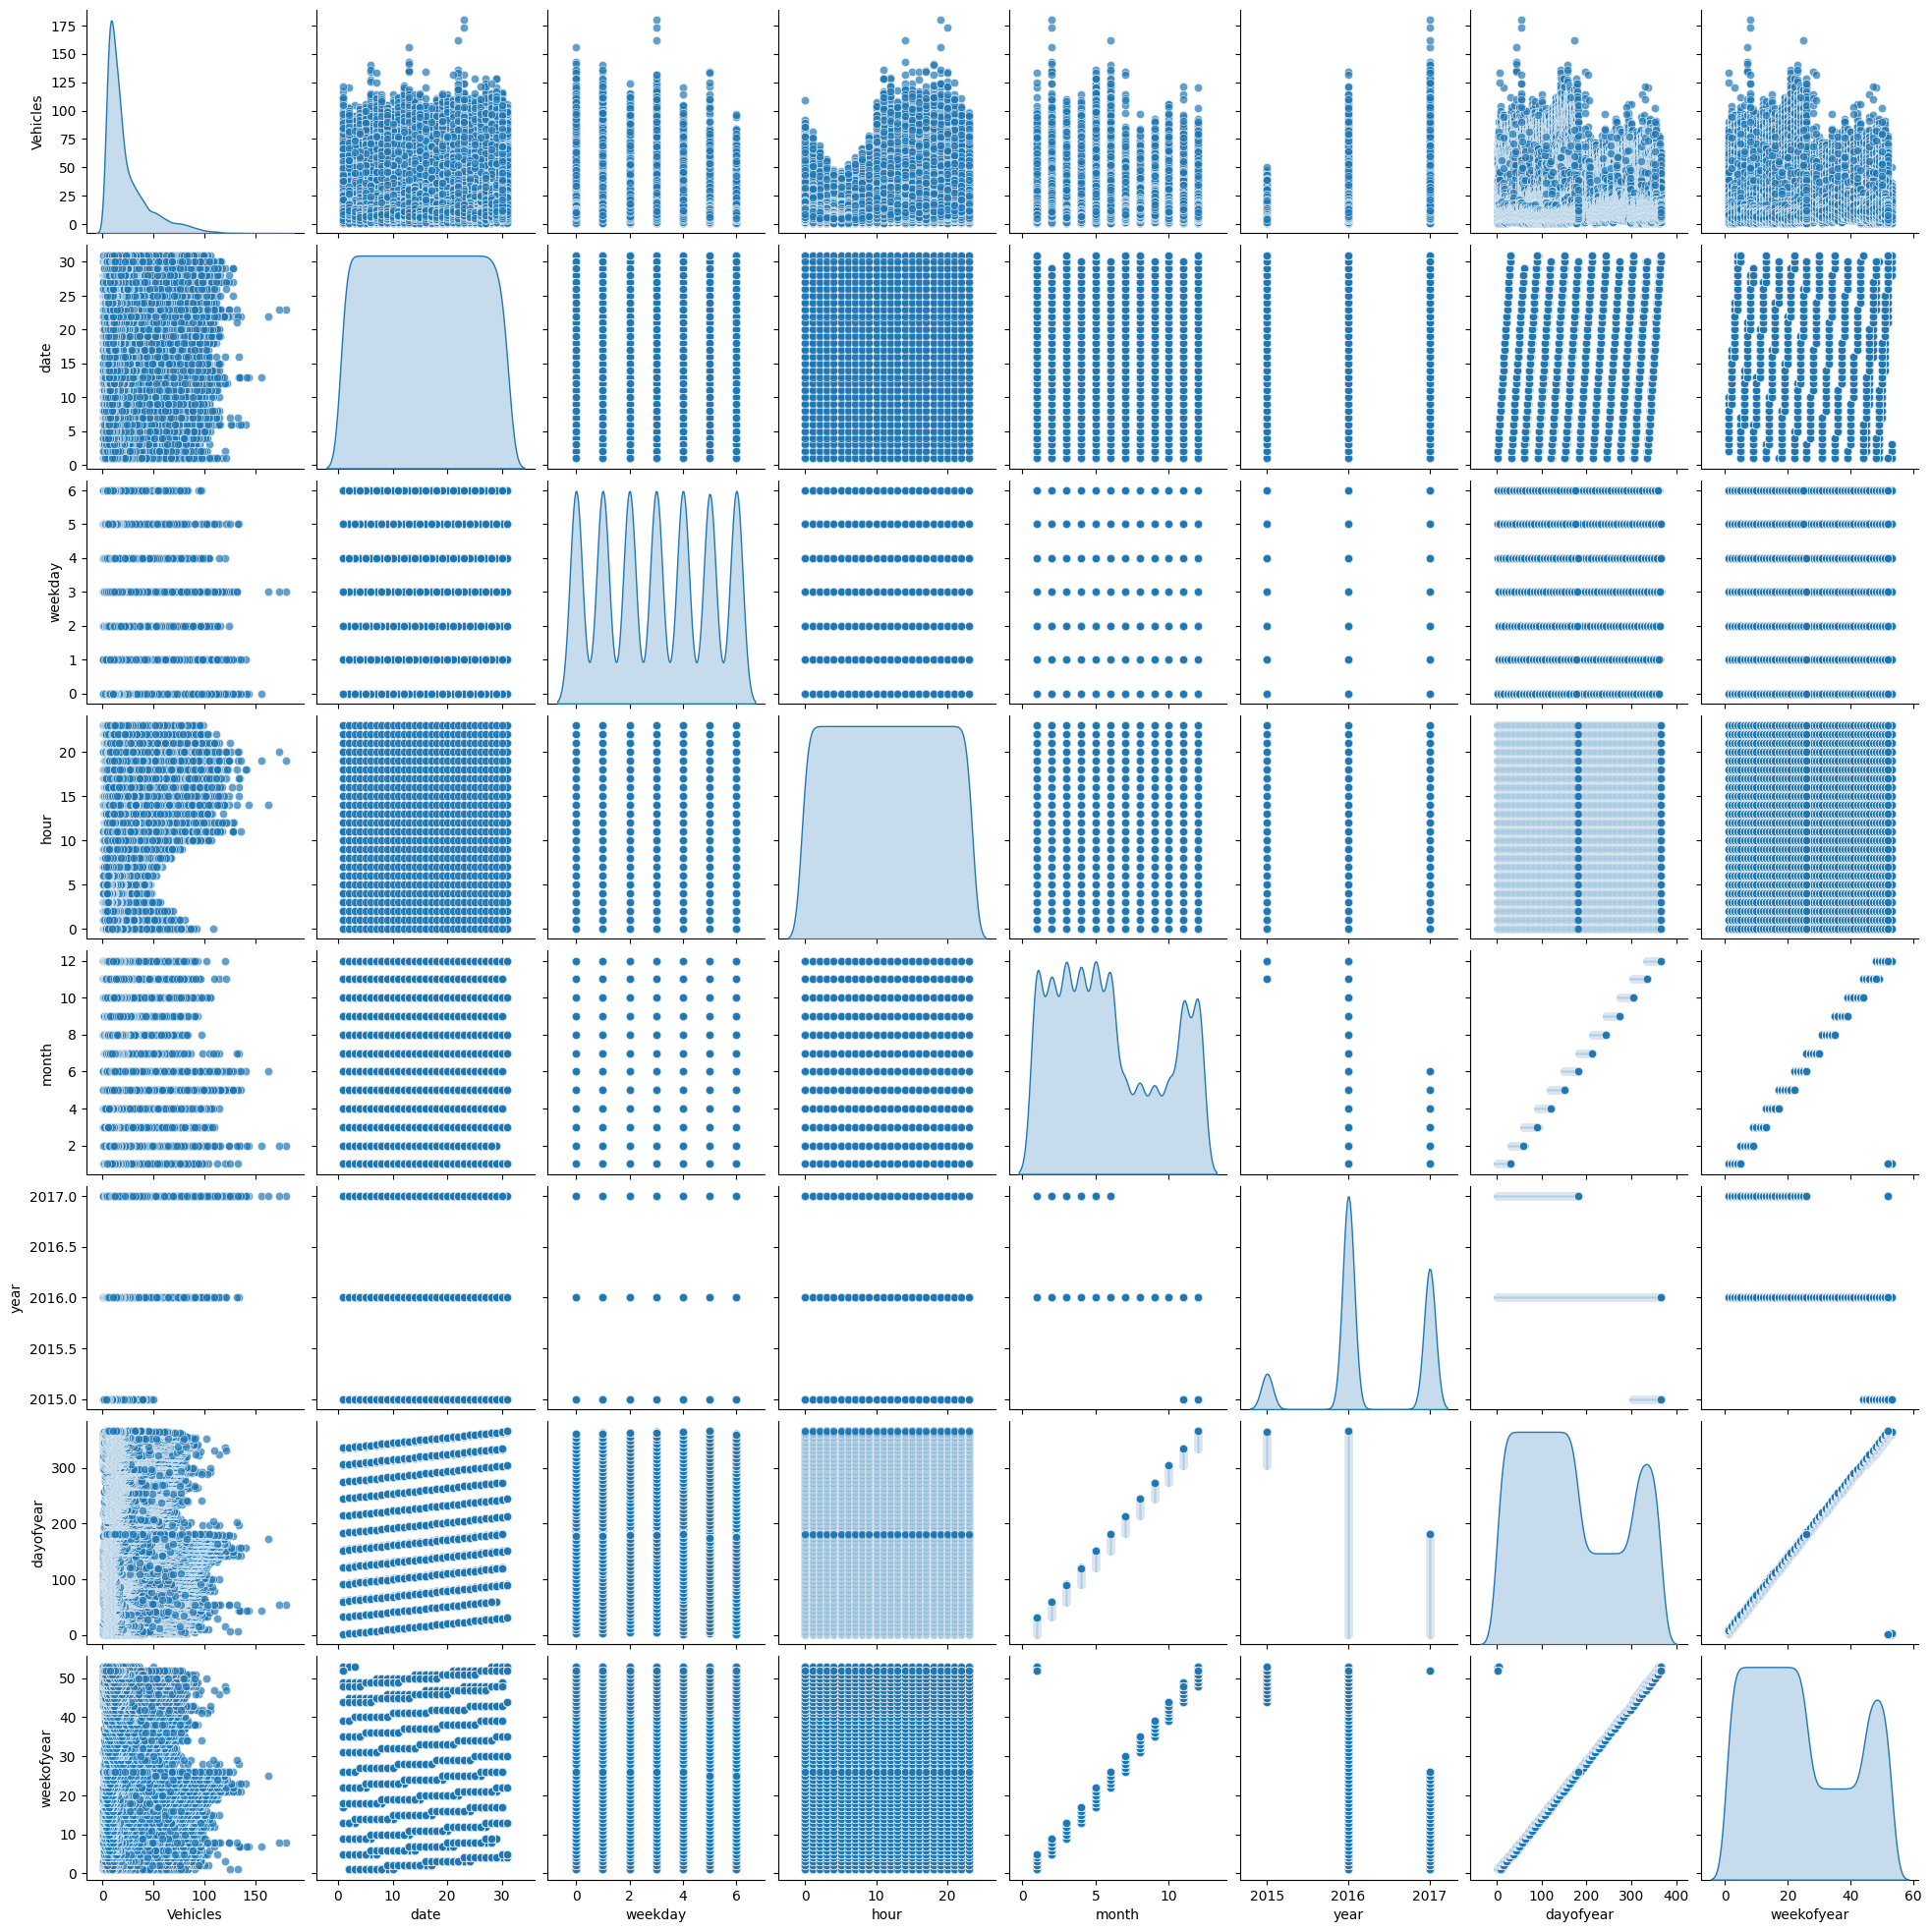

In [175]:
sns.pairplot(df, diag_kind='kde', plot_kws={'alpha':0.7})
plt.show()

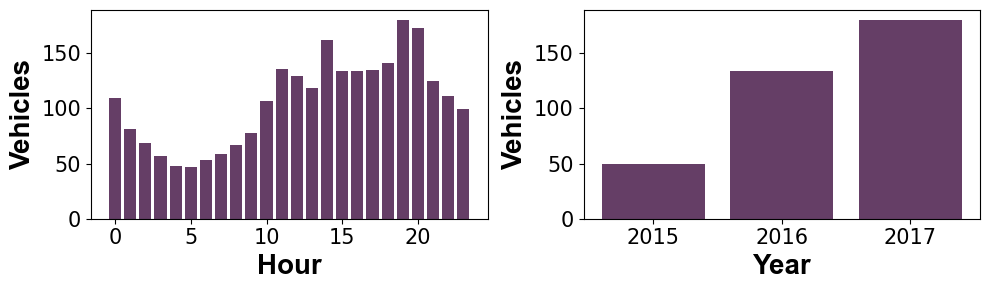

In [176]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

# Plot 1: Vehicles by hour
axes[0].bar(df['hour'], df['Vehicles'], color='#653e66')
axes[0].set_xlabel('Hour', fontsize=20, fontweight='bold', fontname='Arial')
axes[0].set_ylabel('Vehicles', fontsize=20, fontweight='bold', fontname='Arial')
axes[0].tick_params(axis='both', which='major', labelsize=15)

# Plot 2: Vehicles by year
axes[1].bar(df['year'], df['Vehicles'], color='#653e66')
axes[1].set_xlabel('Year', fontsize=20, fontweight='bold', fontname='Arial')
axes[1].set_ylabel('Vehicles', fontsize=20, fontweight='bold', fontname='Arial')
axes[1].tick_params(axis='both', which='major', labelsize=15)

plt.tight_layout()

## Train/test split

In [178]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 19)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## Model Selection

In [180]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)

RandomForestRegressor()

In [181]:
rf_ypred = regressor.predict(X_test)

from sklearn.metrics import mean_absolute_error as mae

print('Training error: ', mae(y_train, regressor.predict(X_train)))
print('Validation error: ', mae(y_test, rf_ypred))

Training error:  13.256885765094736
Validation error:  18.348191368686617


## Test a single prediction

In [277]:
test_date = '2024-07-04 10:20:00'     # Input here the test date
test_date_df = pd.DataFrame([[test_date]], columns = ['DateTime'])

In [271]:
test_date_df['DateTime'] = test_date_df['DateTime'].map(pd.to_datetime)

test_date_df['date'] = test_date_df['DateTime'].map(get_dom)
test_date_df['weekday'] = test_date_df['DateTime'].map(get_weekday)
test_date_df['hour'] = test_date_df['DateTime'].map(get_hour)
test_date_df['month'] = test_date_df['DateTime'].map(get_month)
test_date_df['year'] = test_date_df['DateTime'].map(get_year)
test_date_df['dayofyear'] = test_date_df['DateTime'].map(get_dayofyear)
test_date_df['weekofyear'] = test_date_df['DateTime'].map(get_weekofyear)
test_date_df.drop('DateTime', axis = 1, inplace = True)


In [273]:
date_value = test_date_df['date'].values[0]
weekday_value = test_date_df['weekday'].values[0]
hour_value = test_date_df['hour'].values[0]
month_value = test_date_df['month'].values[0]
year_value = test_date_df['year'].values[0]
dayofyear_value = test_date_df['dayofyear'].values[0]
weekofyear_value = test_date_df['weekofyear'].values[0]

prediction = regressor.predict(sc.transform([[date_value, weekday_value, hour_value, month_value, year_value, dayofyear_value, weekofyear_value]]))
prediction = round(prediction[0])

print('Number of vehicles: ', prediction)

Number of vehicles:  42
